In [1]:
import napari
from napari_assistant._gui._Assistant import Assistant
from skimage.io import imread
from napari_assistant._categories import CATEGORIES
from napari_assistant._workflow_io_utility import initialise_root_functions, load_remaining_workflow
from napari_assistant._undo_redo import delete_workflow_widgets_layers
from napari_workflows import WorkflowManager

filename = 'C:/Users/ryans/OneDrive/Desktop/blobs.tif'
blobs = imread(filename)
blobs_modified = imread('C:/Users/ryans/OneDrive/Desktop/blobs_messed_up.tiff') 

viewer = napari.Viewer()
viewer.add_image(blobs_modified, name = 'not blobs')
viewer.add_image(blobs, name = 'blobs')

manager = WorkflowManager.install(viewer)
assistant = Assistant(viewer)
viewer.window.add_dock_widget(assistant)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


2022-04-28 10:12:58.959 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-04-28 10:12:59.491 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


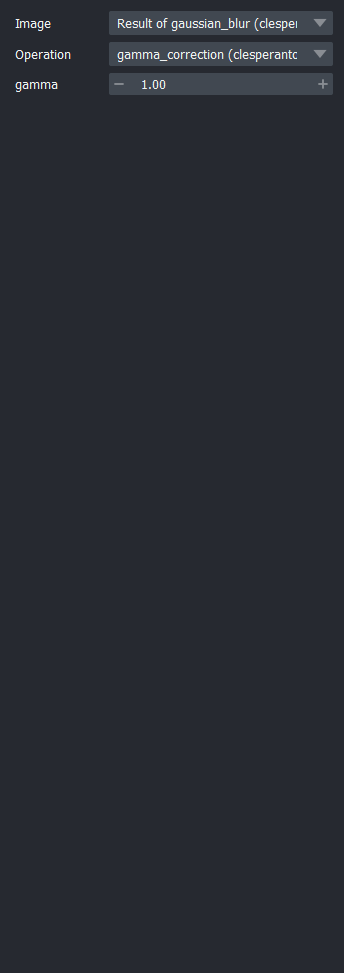

In [2]:
noise_widget = assistant._activate(CATEGORIES.get("Remove noise"))
assistant._activate(CATEGORIES.get("Filter"))

In [3]:
controller = manager.undo_redo_controller
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)



In [4]:
noise_widget["x"].value = 4

2022-04-28 10:13:00.904 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-04-28 10:13:00.975 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


In [5]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [6]:
noise_widget["x"].value = 8
for i in controller.undo_stack:
    print(i)

2022-04-28 10:13:01.069 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 10:13:01.091 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [7]:
noise_widget["x"].value = 9
for i in controller.undo_stack:
    print(i)

2022-04-28 10:13:01.140 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-28 10:13:01.158 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



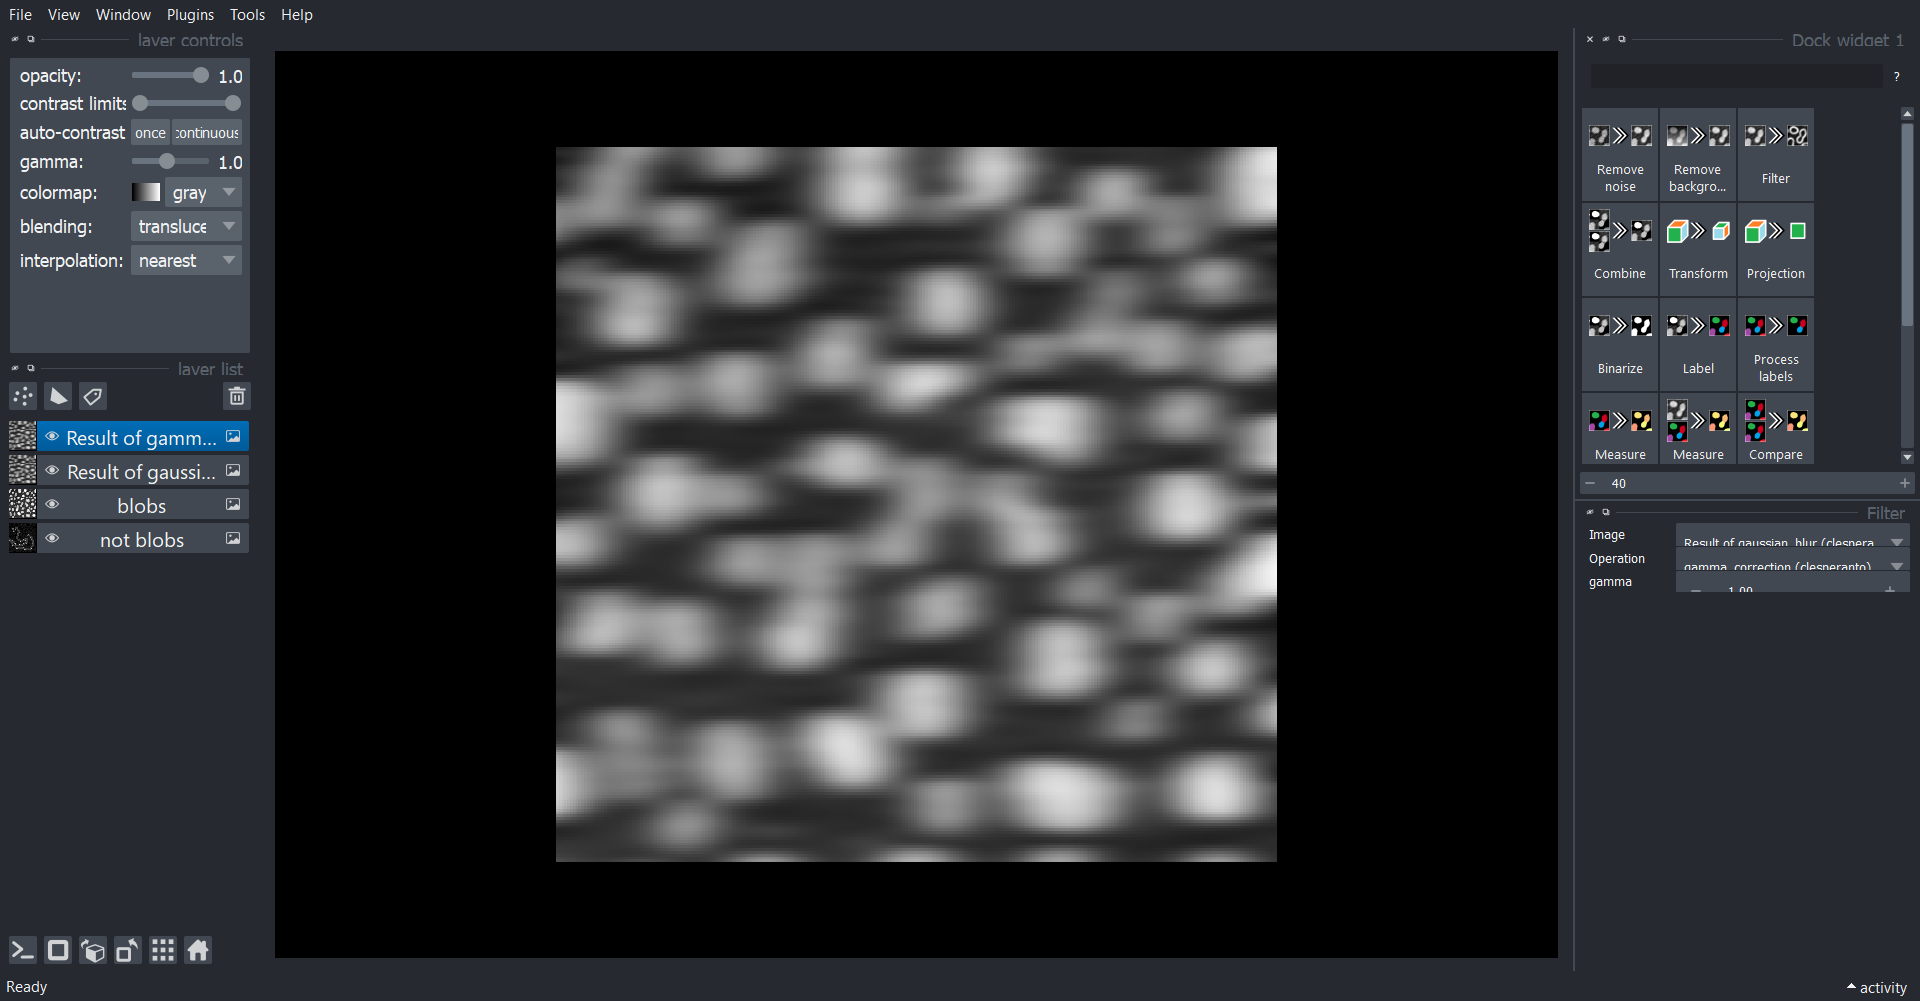

In [8]:
napari.utils.nbscreenshot(viewer)

In [9]:
assistant.undo_action()
for i in controller.undo_stack:
    print(i)
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-04-28 10:13:02.369 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 10:13:02.496 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 10:13:02.576 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-04-28 10:13:02.591 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 10:13:02.628 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



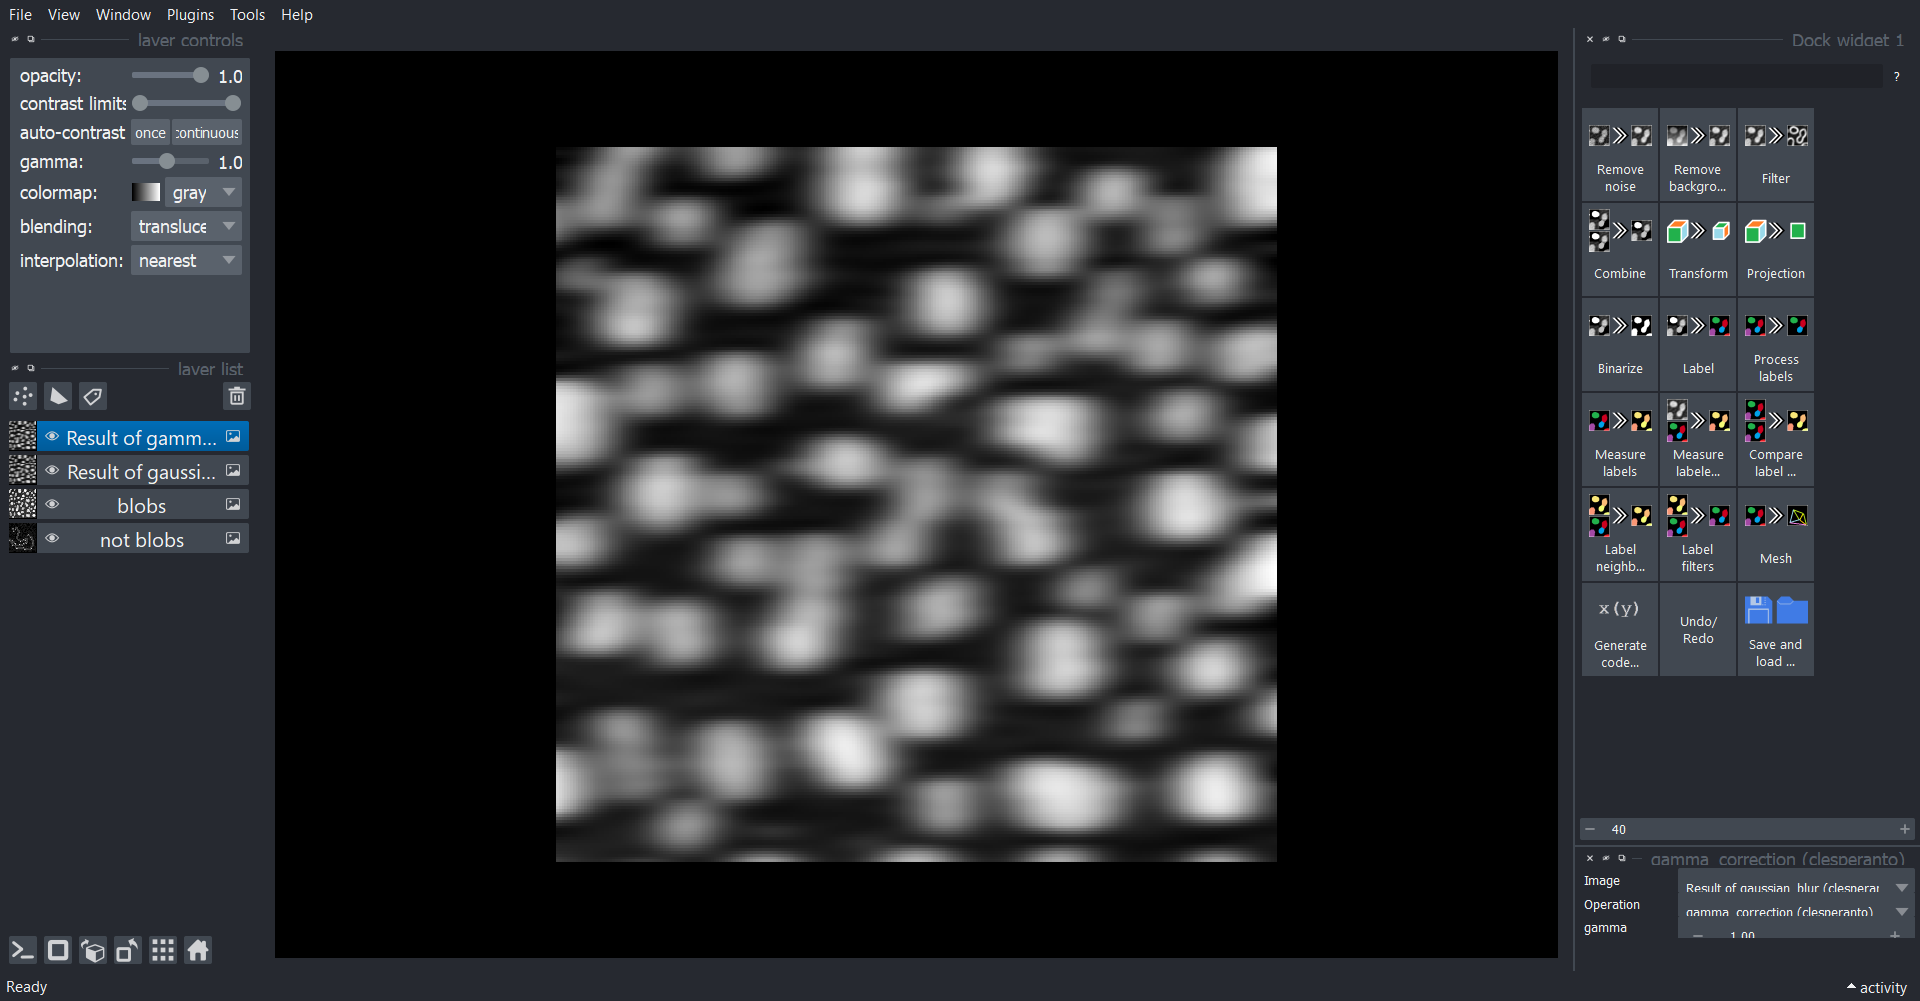

In [10]:
napari.utils.nbscreenshot(viewer)

In [11]:
controller.redo_stack

In [12]:
assistant.redo_action()
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-04-28 10:13:03.851 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-28 10:13:04.118 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 10:13:04.201 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-04-28 10:13:04.216 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)
2022-04-28 10:13:04.258 | INFO     | napari_assistant._gui._category_widget:call_op:163 - gamma_correction (clesperanto)(..., 1.0)


CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 9.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [13]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000299A5E12670>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000299A5E89670>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [14]:
controller.redo_stack

[]

In [15]:
assistant._layers

{<Image layer 'Result of gaussian_blur (clesperanto)' at 0x299ba680100>: (<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x299ba678ee0>,
  <FunctionGui do_remove_noise(*, input0: napari.layers.image.image.Image = <Image layer 'blobs' at 0x299ba4f84c0>, op_name: str = 'gaussian_blur (clesperanto)', x: float = 9.0, y: float = 1.0, z: float = 0.0, u: float = 0.0, v: float = 0.0, w: float = 0.0, a: bool = False, b: bool = False, c: bool = False, k: str = '', l: str = '', m: str = '', viewer: napari.viewer.Viewer = Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 126.5, 127.5), zoom=2.8173504903144777, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 254.0, 1.0), (0.0, 256.0, 1.0)), current_step=(127, 128), order=(0, 1), axis_labels=('0', '1')), grid

In [23]:
keys = [key for key in manager.workflow._tasks.keys()]
key = keys[0]
layer_obj = viewer.layers[key]
layer_obj

<Image layer 'Result of gaussian_blur (clesperanto)' at 0x299ba680100>

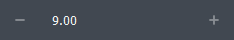

In [26]:
assistant._layers[layer_obj][1]['x']